# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df=pd.read_csv('C:\\Users\\DELL\\Downloads\\used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [4]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [6]:
df.shape

(3454, 15)

### Observations:
There are **3454 Rows** and **15 Columns** in the given data.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

*  There are **11 Numerical** (float64(9) & int64(2)) and **4 Categorical** (object(4))  datatypes.
*  There are **6 columns** with missing values.
*  The target variable is the normalized_used_price, which is of float type



In [8]:
df.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

In [9]:
df['os'].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

### Observations:
*   The data has **34 unique** brands.
*   There are **4** Operatig Systems with maximum devices running on Android

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


### Observations:
*   Normalised used price vary between 1.53 and 6.6,with the mean value of 4.36 and a median value of 4.4 which suggests an approximate normal distribution.
* There are 34 unique brands
* There are 4 types of operating system available with android being the most popular operating system.
* Ram size is mostly 4 gb but there are few devices with very low and very high Ram capacity.





In [11]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### Observations:
*   There are 6 columns with missing values.namely
     1.   main_camera_mp - 179   
     2.   weight         - 7
     3.   Battery        - 6
     4.   ram            - 4
     5.   internal memory- 4
     6.   Selfie camera  - 2





In [12]:
df.duplicated().sum()

0

### Observations:
*   There are **no duplicate** values in the data.

In [13]:
df1=df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [14]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
def labeled_barplot(data, feature,name, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 4))
    else:
        plt.figure(figsize=(n + 2, 4))
    plt.xticks(rotation=0, fontsize=12)
    ax = sns.countplot(data=data,x=feature,order=data[feature].value_counts().index[:n])

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points")
    plt.title(name);
    plt.show()

#### Normalized New Device price

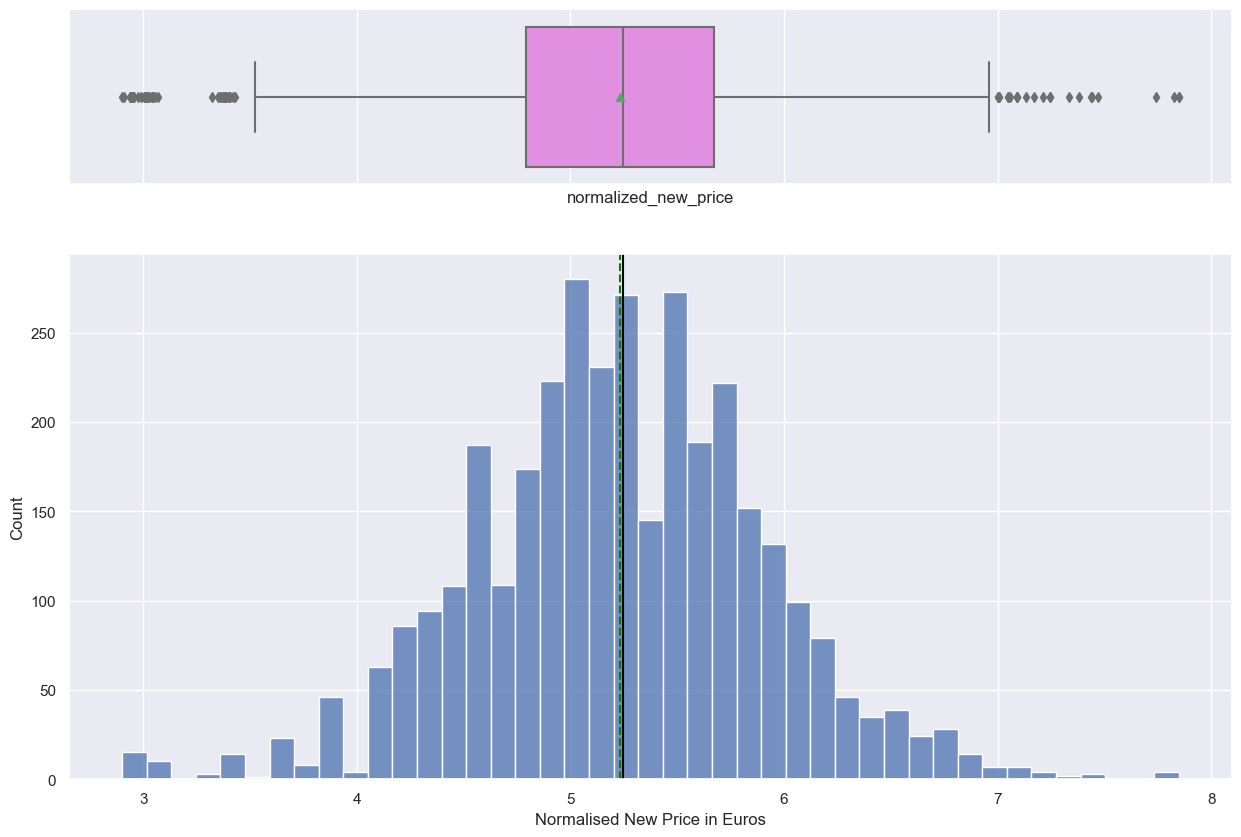

In [16]:
histogram_boxplot(df1,'normalized_new_price')
plt.xlabel('Normalised New Price in Euros');

### Observations:
*   The New device prices is approximately Normally distributed as the mean and the median values are very close.
*   There are Outliers present in both the ends of the box plot.

#### Main Camera Resolution

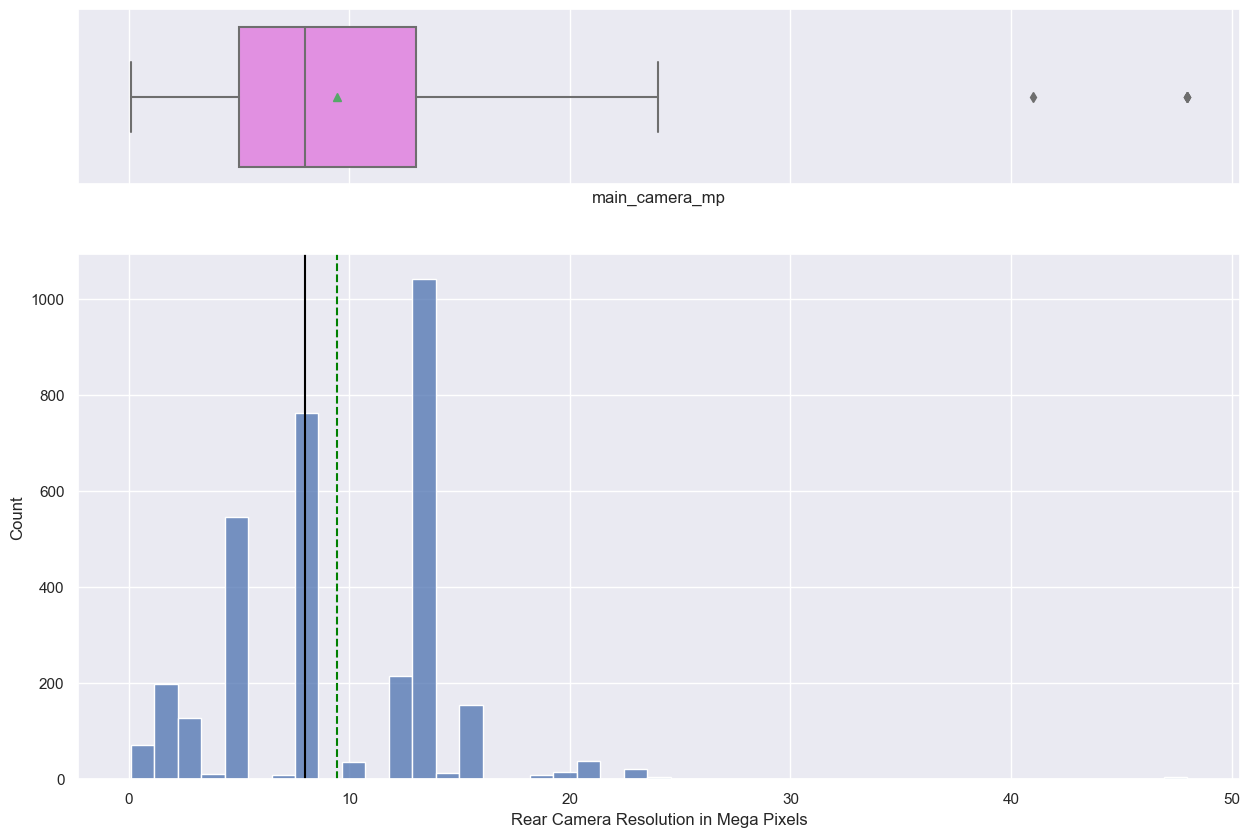

In [17]:
histogram_boxplot(df1,"main_camera_mp")
plt.xlabel("Rear Camera Resolution in Mega Pixels");

### Observations:
There are some Outliers present in the upper End.

#### Selfie Camera Resolution

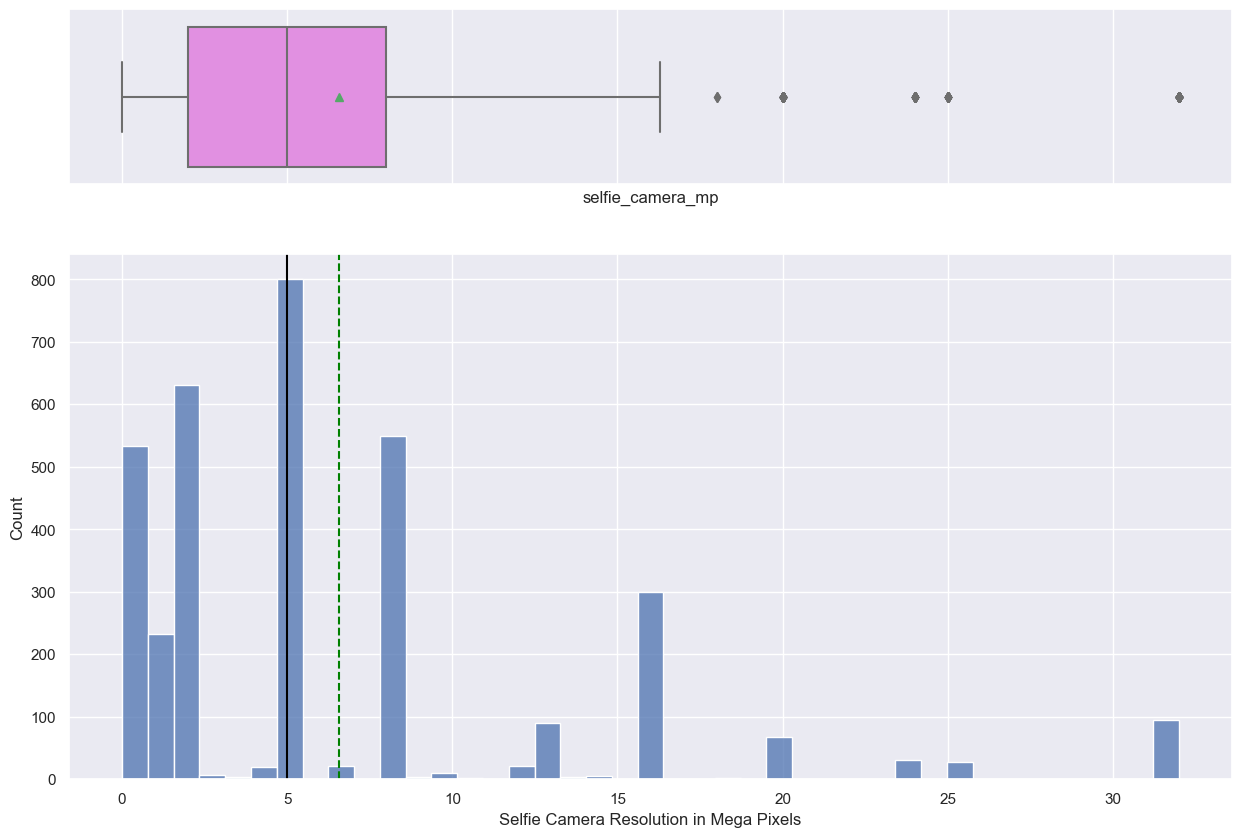

In [18]:
histogram_boxplot(df1,"selfie_camera_mp")
plt.xlabel("Selfie Camera Resolution in Mega Pixels");

### Observations:
*   The distribution shows right Skewness
*   There are Outliers present in the Upper end.

#### Internal Memory in GB

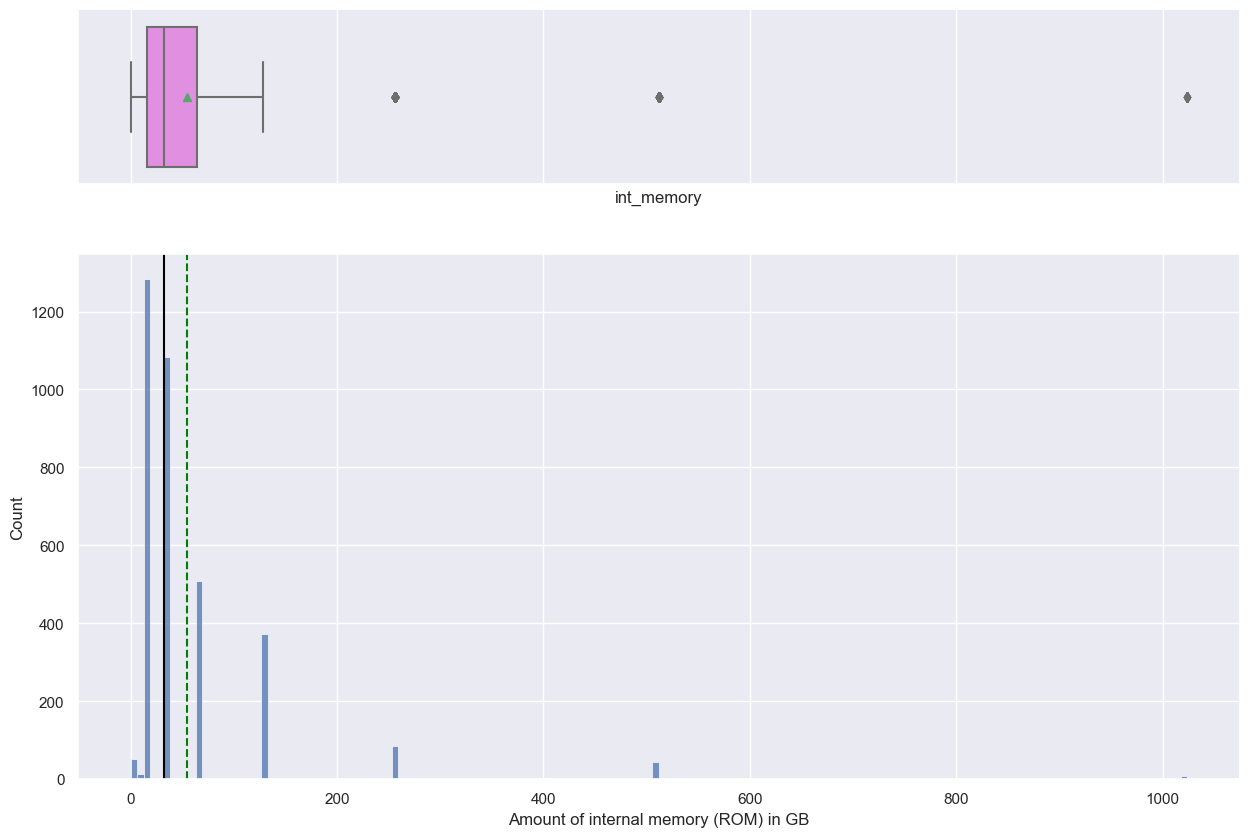

In [19]:
histogram_boxplot(df1,"int_memory")
plt.xlabel("Amount of internal memory (ROM) in GB");

### Observations:
*   The distribution shows right Skewness
*   There are few  Outliers present.

#### Amount of RAM in GB

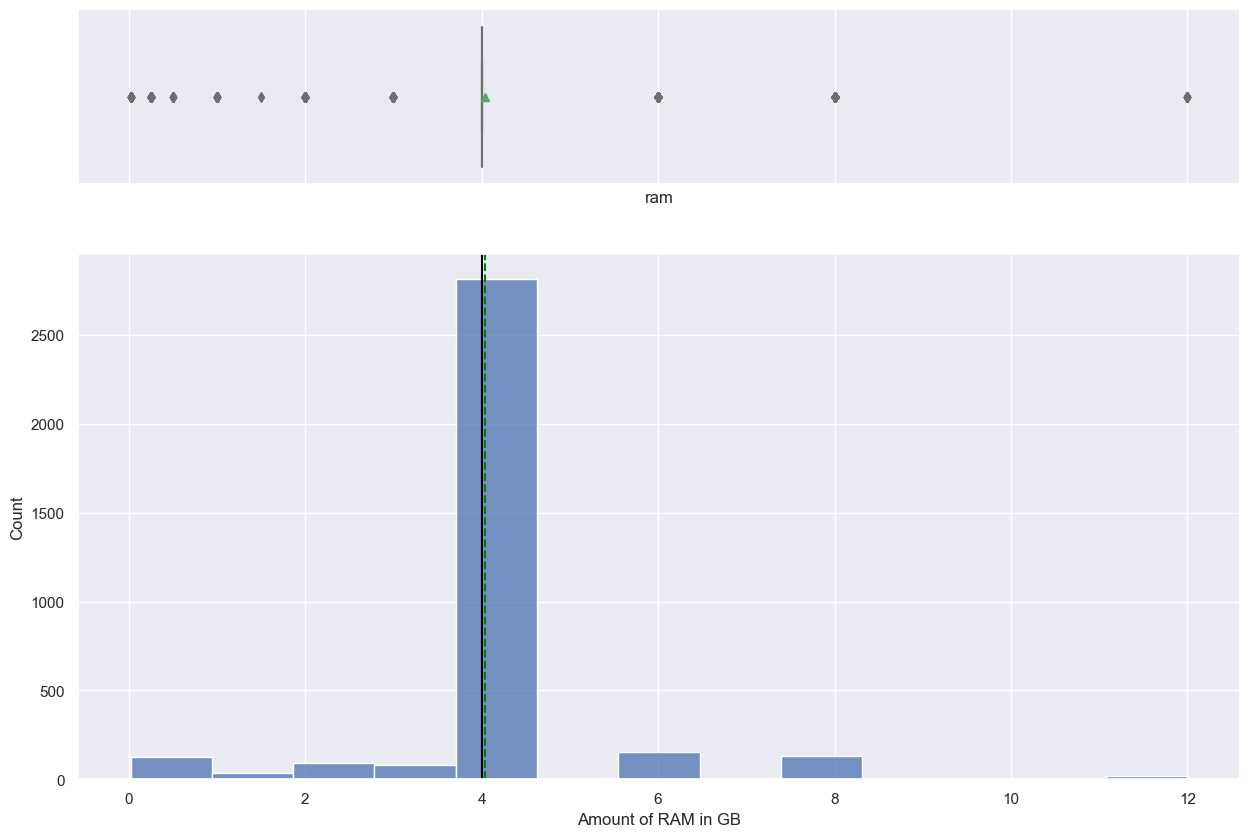

In [20]:
histogram_boxplot(df1,"ram")
plt.xlabel("Amount of RAM in GB");

### Observations:
*  Majority of Ram size present in the data is 4 Gb.

#### Battery Capacity in mAh

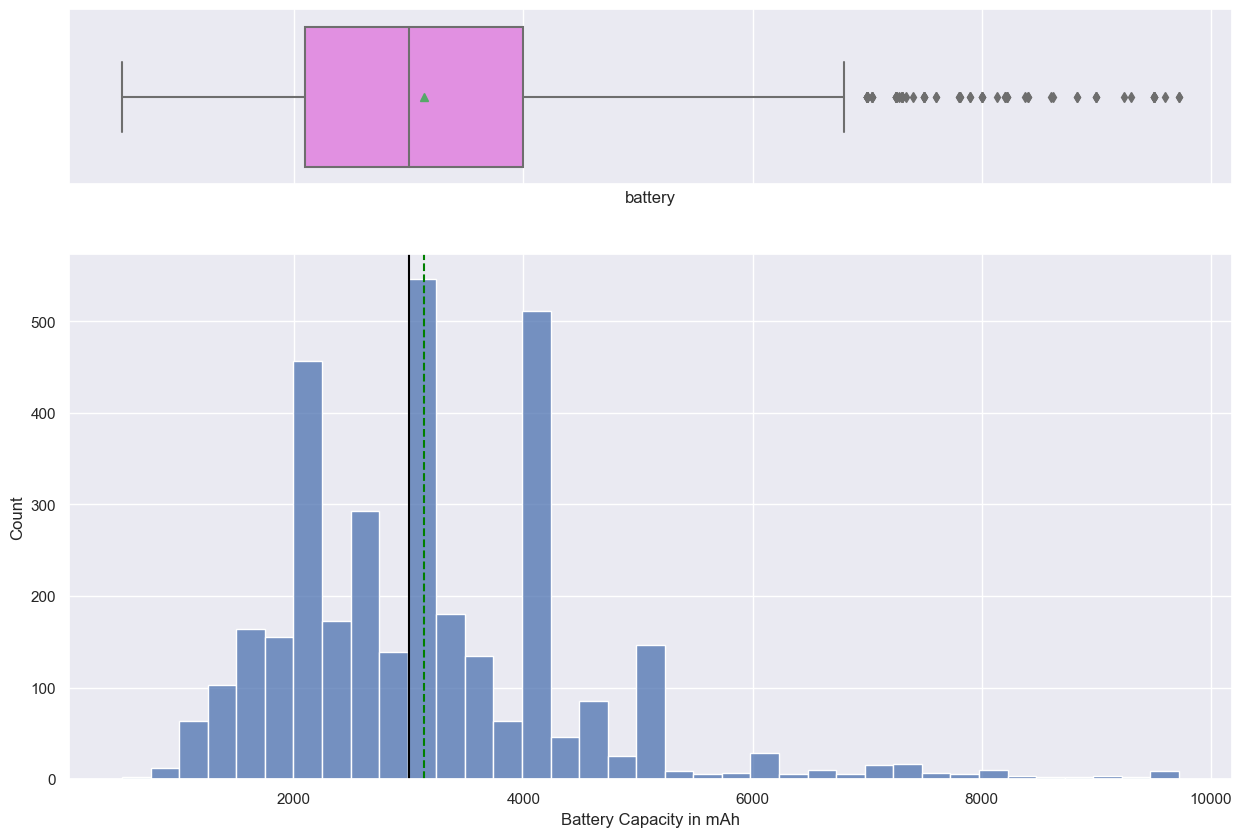

In [21]:
histogram_boxplot(df1,"battery")
plt.xlabel("Battery Capacity in mAh");

### Observations:
*   The distribution Shows a little right skewness
*   Outliers are present.

#### Weight of the device

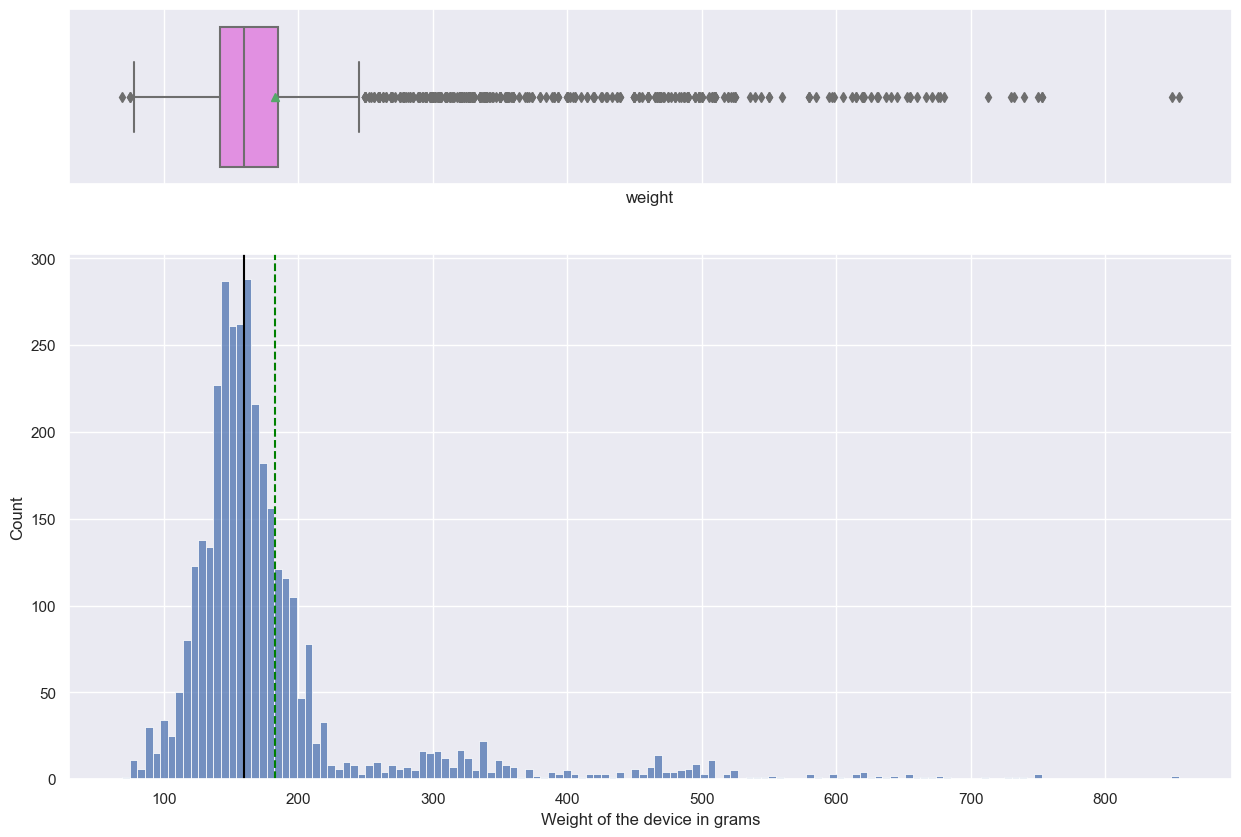

In [22]:
histogram_boxplot(df1,"weight")
plt.xlabel("Weight of the device in grams");

### Observations:
 The weight is approxiamtely normally distributed with many outliers present in the upper end of the boxplot.


#### Number of days Used

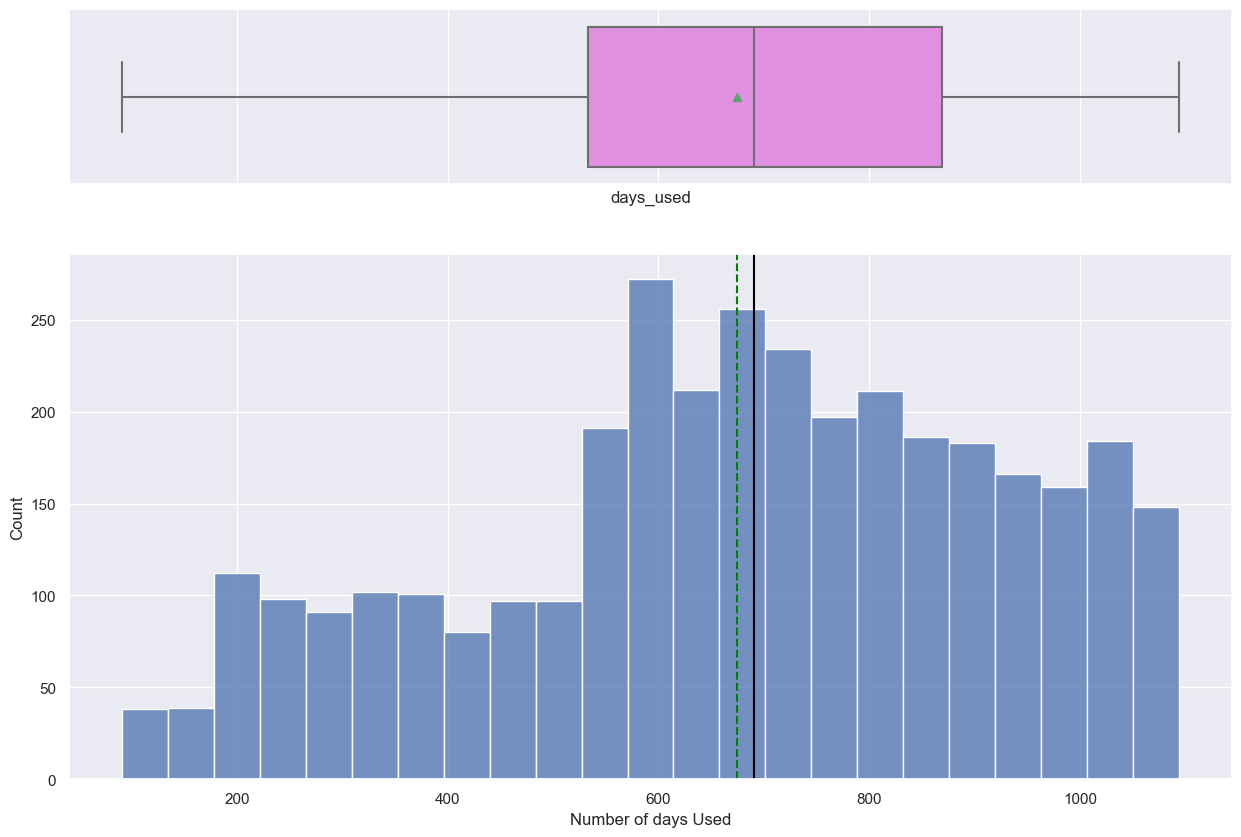

In [23]:
histogram_boxplot(df1,"days_used")
plt.xlabel("Number of days Used");

### Observations:
* The distribution shows a little left Skewness
* There are no Outliers


#### Manufacturing Brand

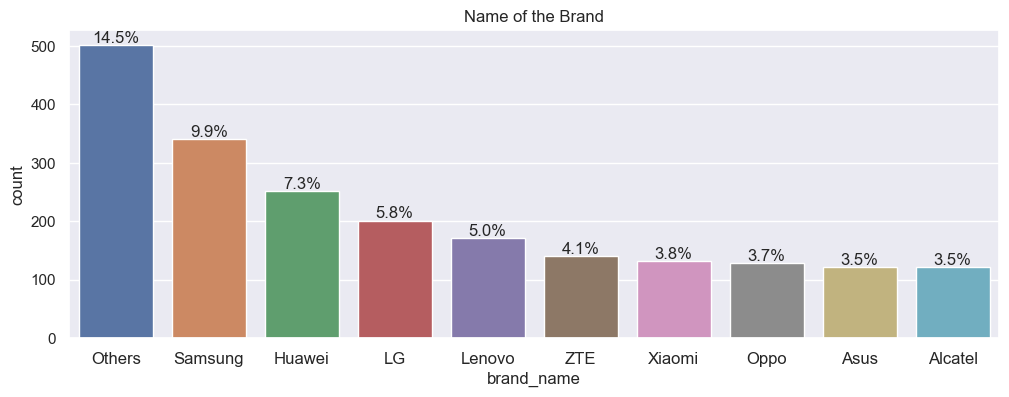

In [24]:
labeled_barplot(df1, "brand_name",'Name of the Brand',perc=True, n=10)

### Observations:
Most of the  devices fall in the Other Brand category with Samsung coming second having the most refurbished devices in terms of brand name.



#### Release Year for The Device

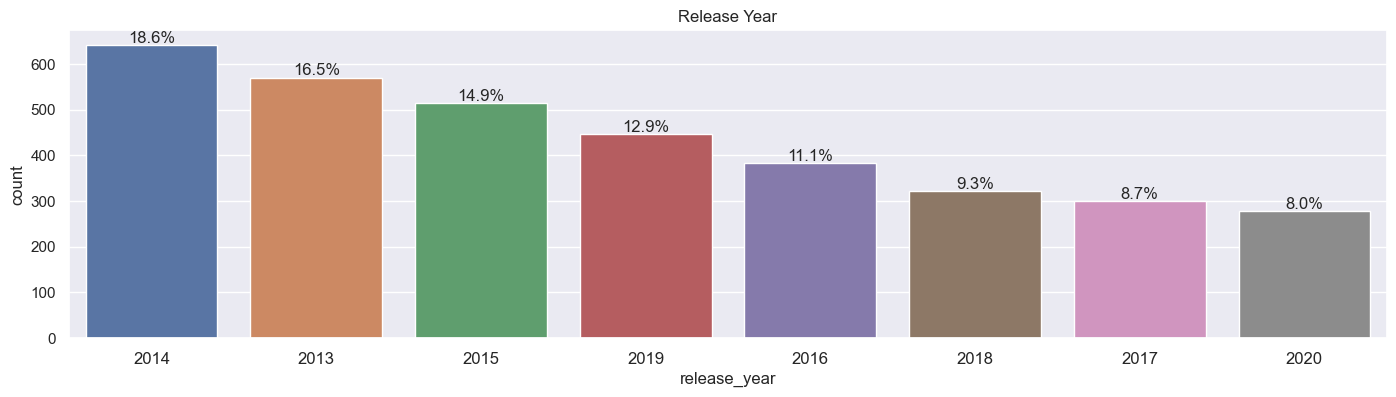

In [25]:
labeled_barplot(df1, "release_year",'Release Year',perc=True, n=15)

### Observations:
* Around 18.6% of the devices present in the data where released in the year 2014.



#### Size of the Screen

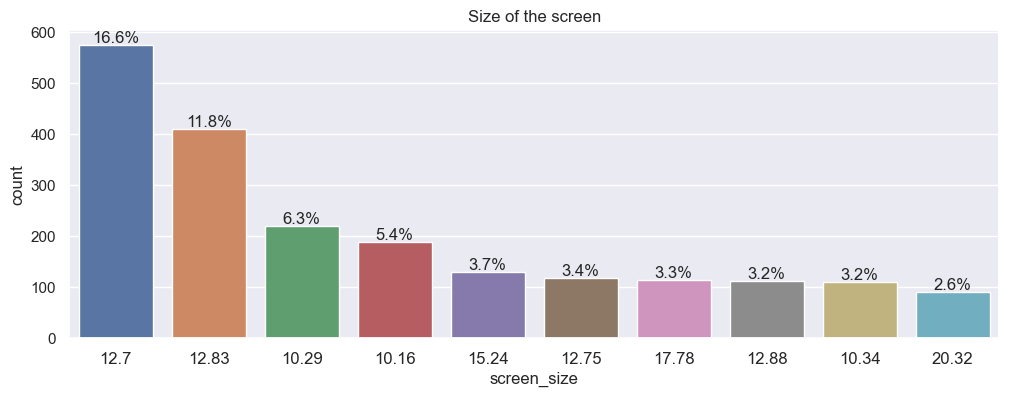

In [26]:
labeled_barplot(df1, "screen_size",'Size of the screen',perc=True,n=10)

### Observations:
* Most of the refurbished devices have a screen size of approximately 12 cms.


#### Type of Network

##### 4G Network

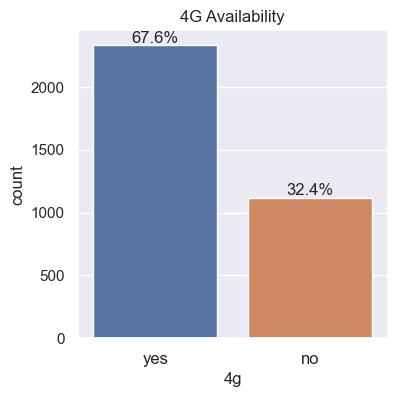

In [27]:
labeled_barplot(df1,'4g','4G Availability',perc=True)

### Observations:
* Majority of devices have 4g connectivity

##### 5G Network

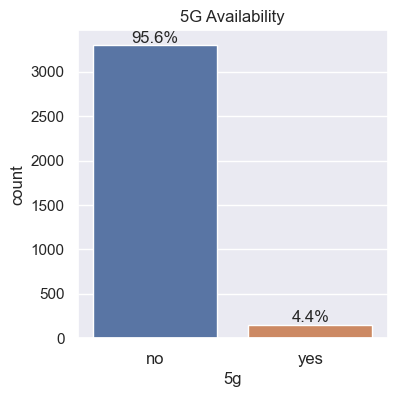

In [28]:
labeled_barplot(df1,'5g','5G Availability',perc=True)

### Observations:
* There are only few devices with 5g connectivity.

### **1.What does the distribution of normalized used device prices look like?**

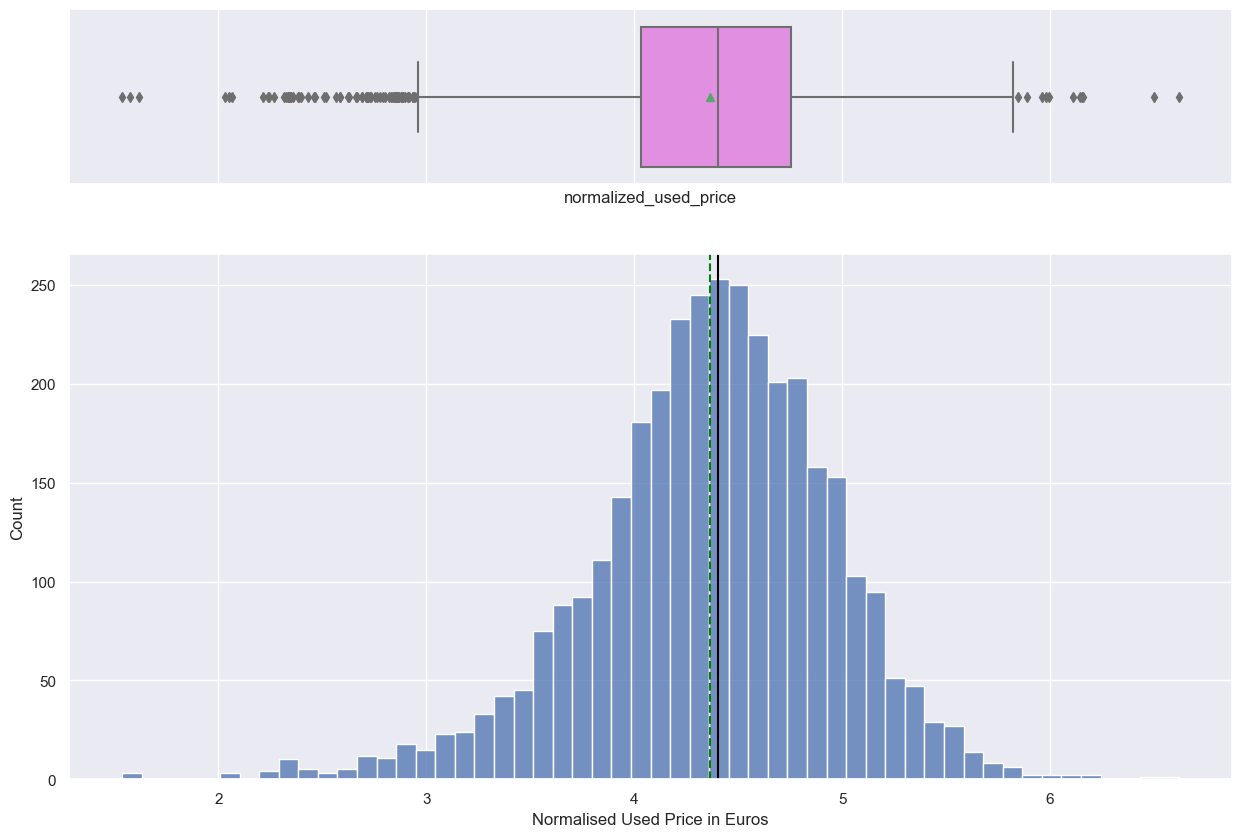

In [29]:
histogram_boxplot(df1,'normalized_used_price')
plt.xlabel('Normalised Used Price in Euros');

### Observations:
* Normalised used price data shows approximately a Normal distribution
* There are Outliers present in both ends.



### **2.What percentage of the used device market is dominated by Android devices?**

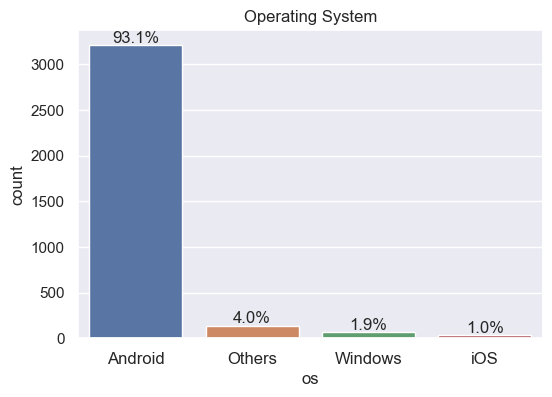

In [30]:
labeled_barplot(df1, "os",'Operating System',perc=True)

### Observations:
* A majority of 93.1% of the devices run on Android Operating system.


### Bivariate Analysis

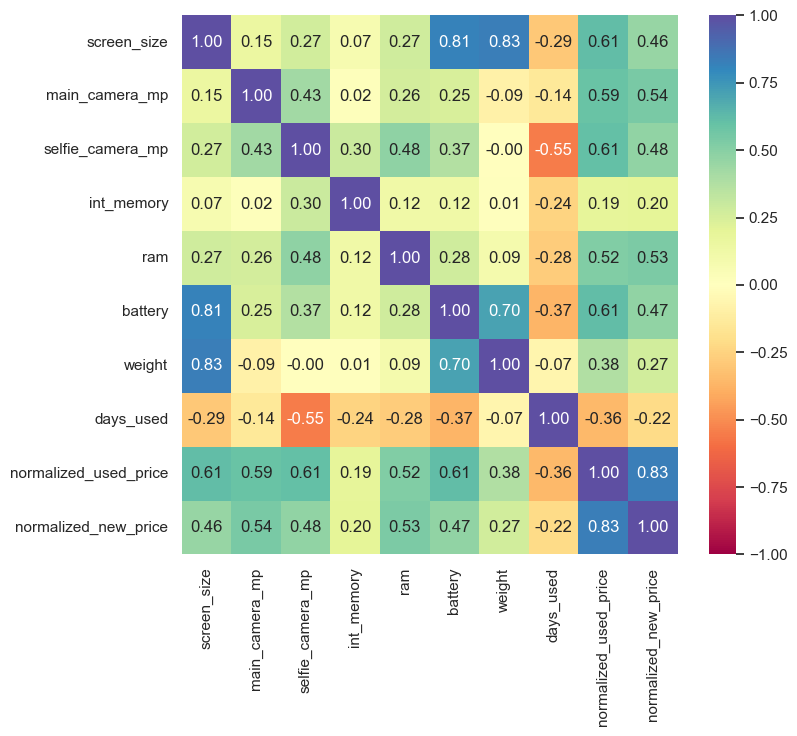

In [31]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")
plt.figure(figsize=(8, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

### Observations:
* Screen Size and weight are highly correlated.
* Screen Size and battery are highly correlated.
* Weight and battery are highly correlated cause increse in battery size increases the weight.
* Normalised used price and Normalised new price is highly correlated.
* Normalised used price and days used is negatively correlated.


### **3.The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

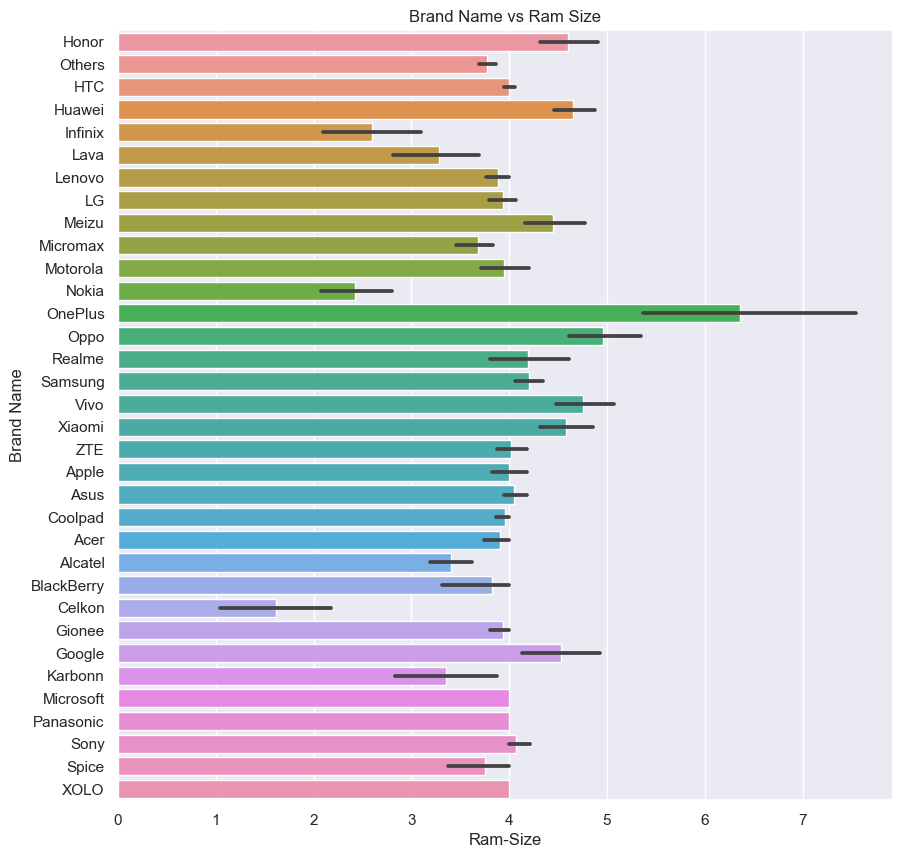

In [32]:
plt.figure(figsize=(10, 10))
sns.barplot(df1,x='ram',y='brand_name');
plt.xlabel('Ram-Size')
plt.ylabel('Brand Name')
plt.title('Brand Name vs Ram Size');

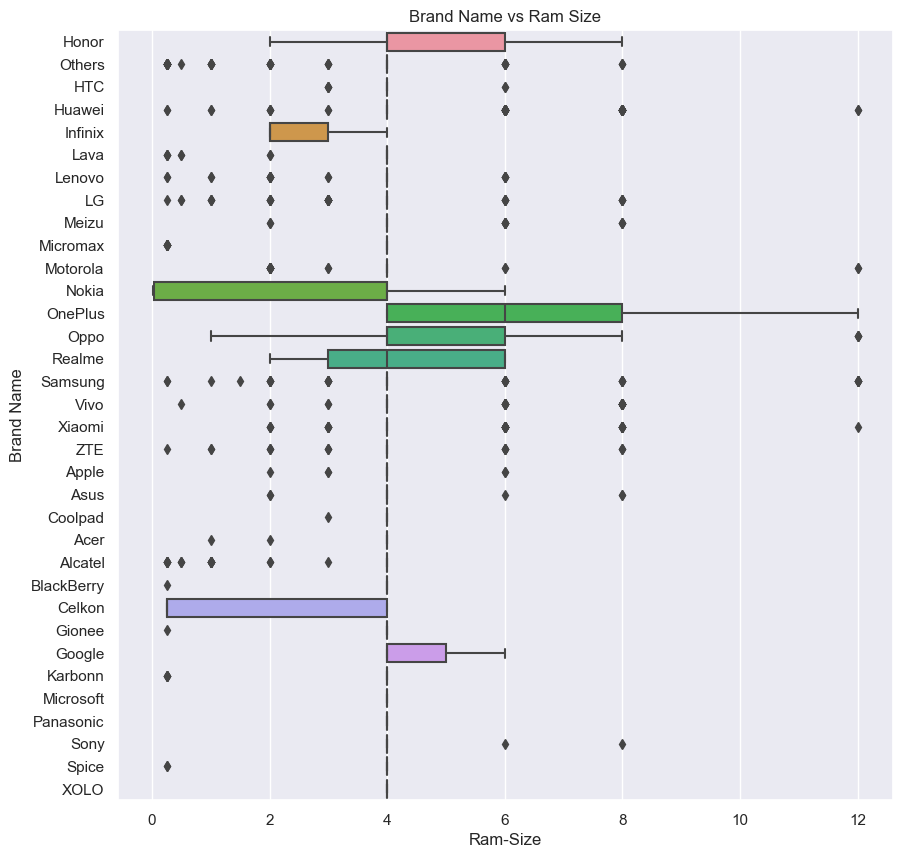

In [33]:
plt.figure(figsize=(10, 10))
sns.boxplot(df1,x='ram',y='brand_name');
plt.xlabel('Ram-Size')
plt.ylabel('Brand Name')
plt.title('Brand Name vs Ram Size');

### Observations:
* Brand Oneplus offers max Amount of ram size compared to the other brands.
* Brand Celkon offers maximun 4gb ram size options.


### **4.A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [34]:
big_bat=df1[df1['battery']>4500]

In [35]:
big_bat['brand_name'].value_counts().nlargest(5)

Samsung    50
Others     41
Huawei     37
Xiaomi     31
Lenovo     28
Name: brand_name, dtype: int64

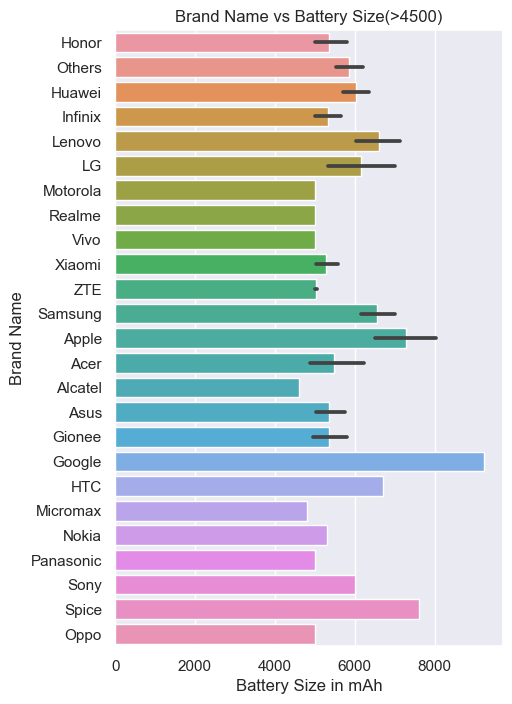

In [36]:
plt.figure(figsize=(5, 8))
sns.barplot(big_bat,y='brand_name',x='battery')
plt.xlabel('Battery Size in mAh')
plt.ylabel('Brand Name')
plt.title('Brand Name vs Battery Size(>4500)');

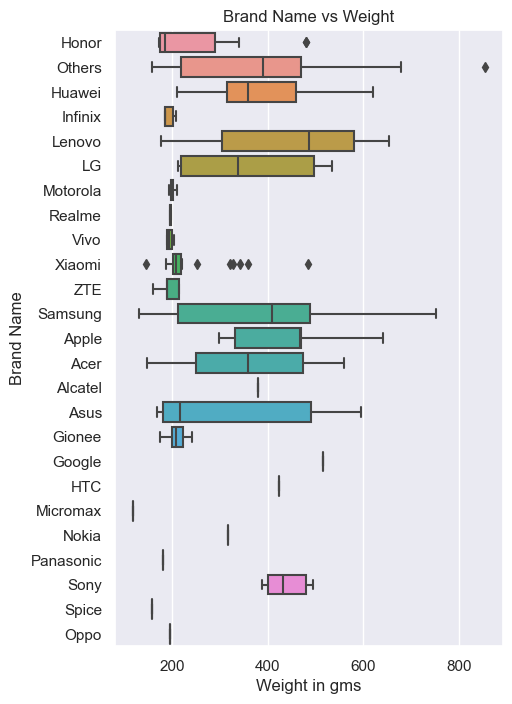

In [37]:
plt.figure(figsize=(5, 8))
sns.boxplot(big_bat,y='brand_name',x='weight')
plt.xlabel('Weight in gms')
plt.ylabel('Brand Name')
plt.title('Brand Name vs Weight');

In [38]:
big_bat.groupby('os')['battery'].count()

os
Android    324
Others       3
iOS         14
Name: battery, dtype: int64

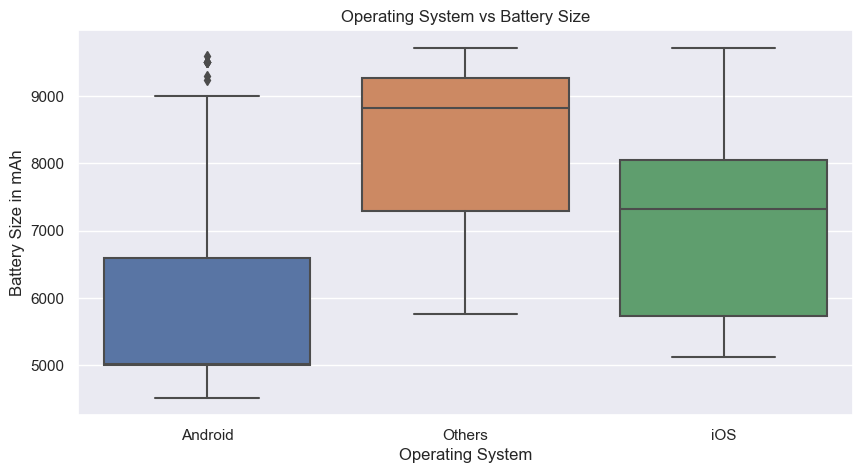

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(big_bat,x='os',y='battery')
plt.xlabel('Operating System')
plt.ylabel('Battery Size in mAh')
plt.title('Operating System vs Battery Size');

In [40]:
big_bat['battery'].corr(big_bat['weight'])

0.7576216347513972

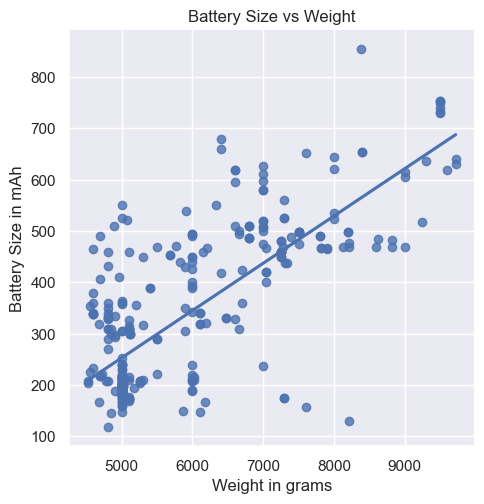

In [41]:
sns.lmplot(big_bat,x='battery',y='weight',ci=None)
plt.xlabel('Weight in grams')
plt.ylabel('Battery Size in mAh')
plt.title('Battery Size vs Weight');

### Observations:
* Google offers the maximun battery capacity of over 8000 mAh
* Majority of devices with high battery capacity run on Android os.
* Bigger batteries and weight of the devices are highly correlated



### **5.Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [42]:
big_screen=df1[df1['screen_size']>(6*2.54)]

In [43]:
df1["brand_name"].nunique()

34

In [44]:
big_screen["brand_name"].nunique()

31

In [45]:
big_screen["brand_name"].value_counts().nlargest(5)

Huawei     149
Samsung    119
Others      99
Vivo        80
Honor       72
Name: brand_name, dtype: int64

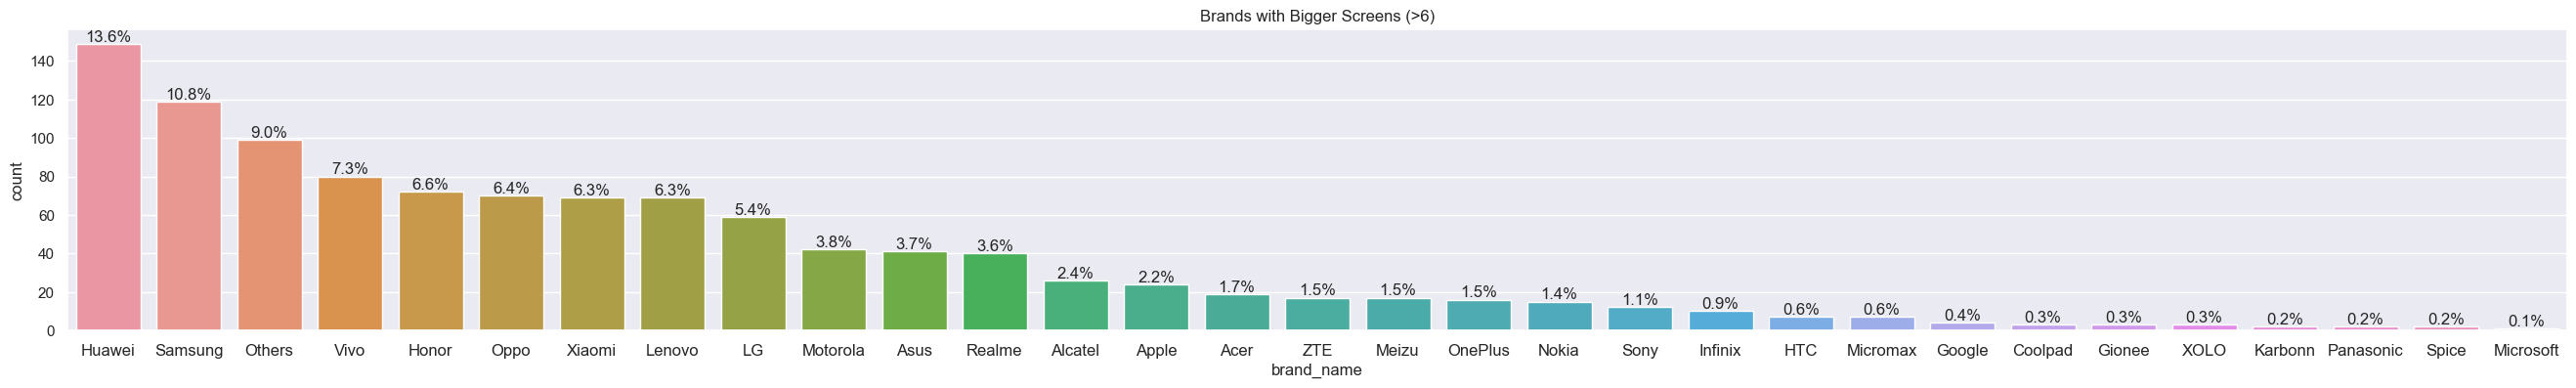

In [46]:
labeled_barplot(big_screen,'brand_name','Brands with Bigger Screens (>6)',perc=True)

In [47]:
big_screen['os'].value_counts()

Android    1070
iOS          21
Others        6
Windows       2
Name: os, dtype: int64

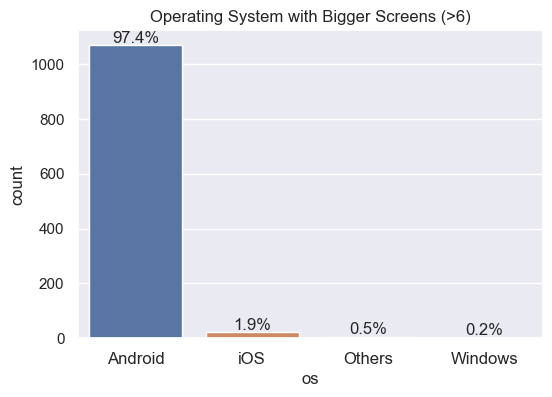

In [48]:
labeled_barplot(big_screen,'os','Operating System with Bigger Screens (>6)',perc=True)

### Observations:
* There are 31 brands out of 34 which offer bigger screen of size more than 6 inches.
* Huawei offers more phones with bigger screens compared to other brands with Samsung taking a close second position.
* Majority of devices with bigger screen run on Android Os.



### **6.A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [49]:
better_selfie=df1[df1['selfie_camera_mp']>8]

In [50]:
better_selfie["brand_name"].value_counts().nlargest(5)

Huawei     87
Vivo       78
Oppo       75
Xiaomi     63
Samsung    57
Name: brand_name, dtype: int64

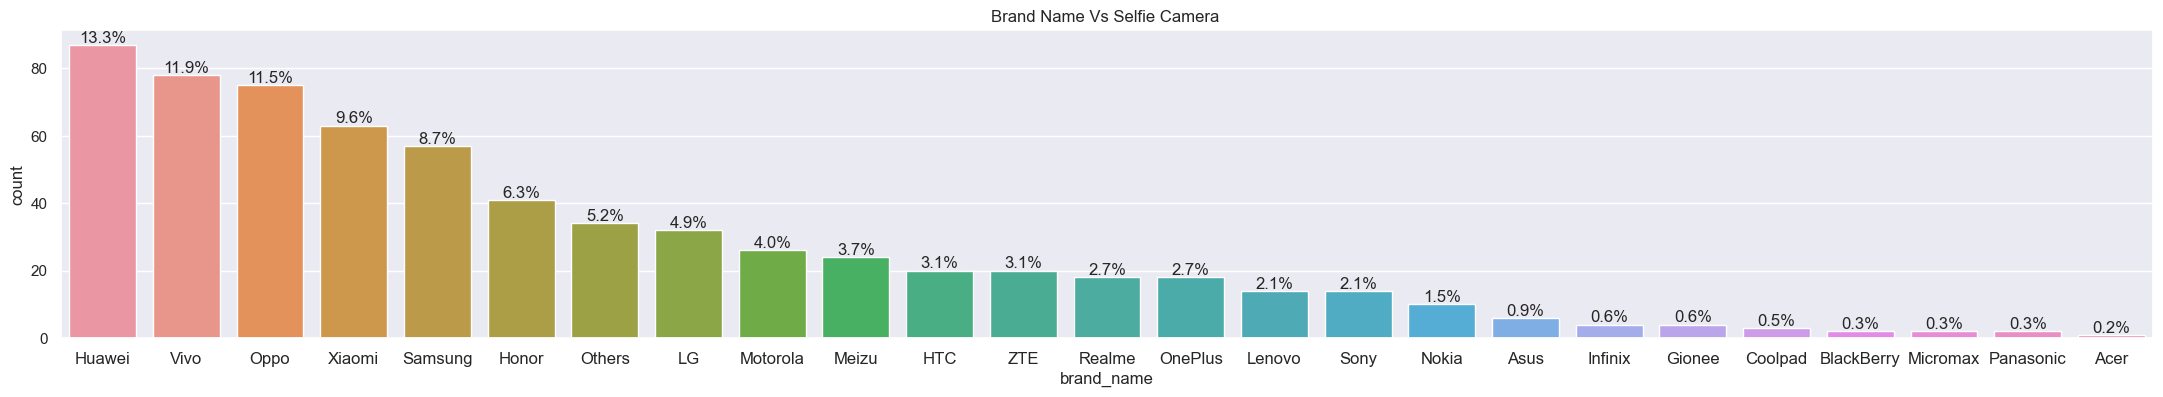

In [51]:
labeled_barplot(better_selfie, "brand_name",'Brand Name Vs Selfie Camera ', perc=True);

In [52]:
better_selfie['os'].value_counts()

Android    653
Others       2
Name: os, dtype: int64

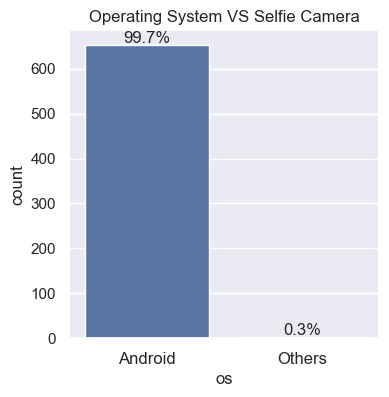

In [53]:
labeled_barplot(better_selfie,'os','Operating System VS Selfie Camera',perc=True)

### Observations:
* Huawei offers maximum number of devices with a selfie camera greater than 8 mp followed by Vivo.
* Android is the operating system prsent in majority of devices with selfie camera of 8 mp and above
* There are no devices running on IOS and windows with a selfie camera greater than 8 Mp.



#### Similar analysis for Rear Camera

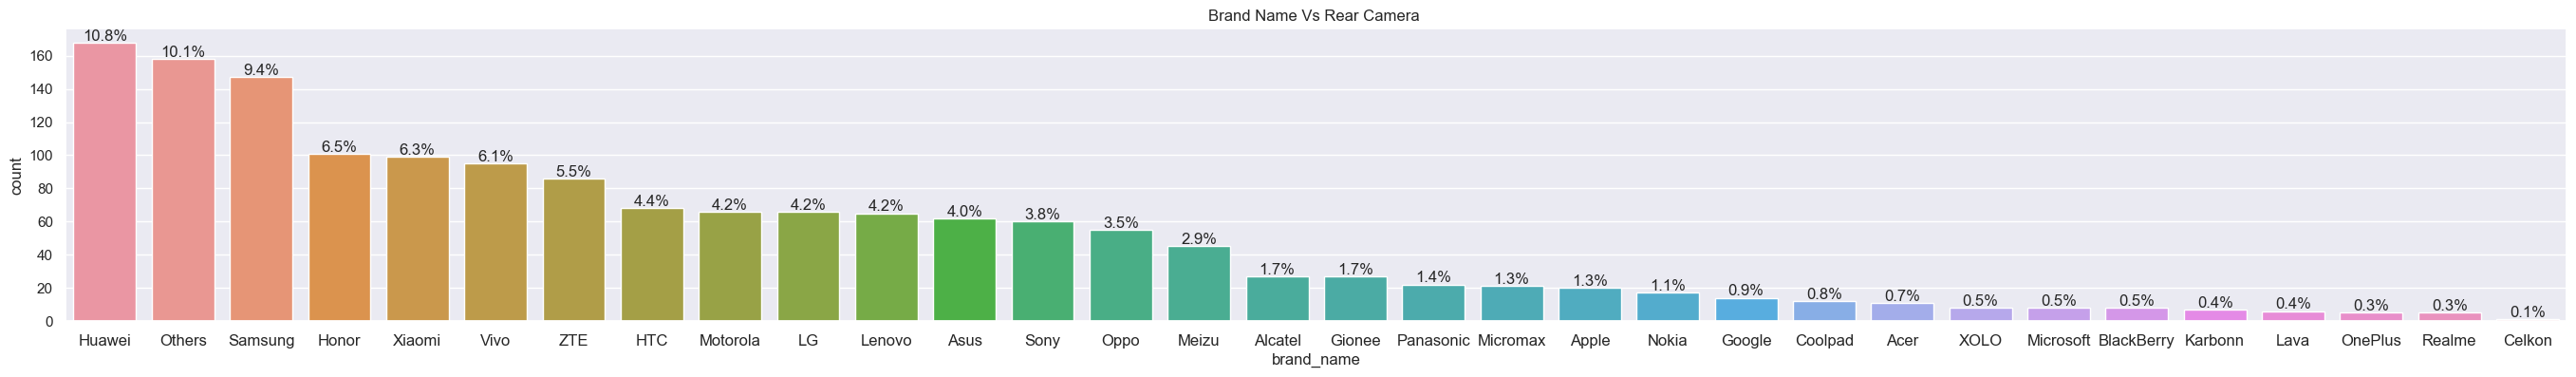

In [54]:
main_camera=df1[df1['main_camera_mp']>8]
labeled_barplot(main_camera, "brand_name",'Brand Name Vs Rear Camera ', perc=True);

### **7.Which attributes are highly correlated with the normalized price of a used device?**

In [55]:
df1[cols_list].corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,-0.067470,0.382354,0.269540
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,-0.358264,1.000000,0.834496
normalized_new_price,0.460889,0.541655,0.475479,0.195992,0.532056,0.470754,0.269540,-0.216625,0.834496,1.000000


In [56]:
df1.select_dtypes(include=np.number).columns.tolist()

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

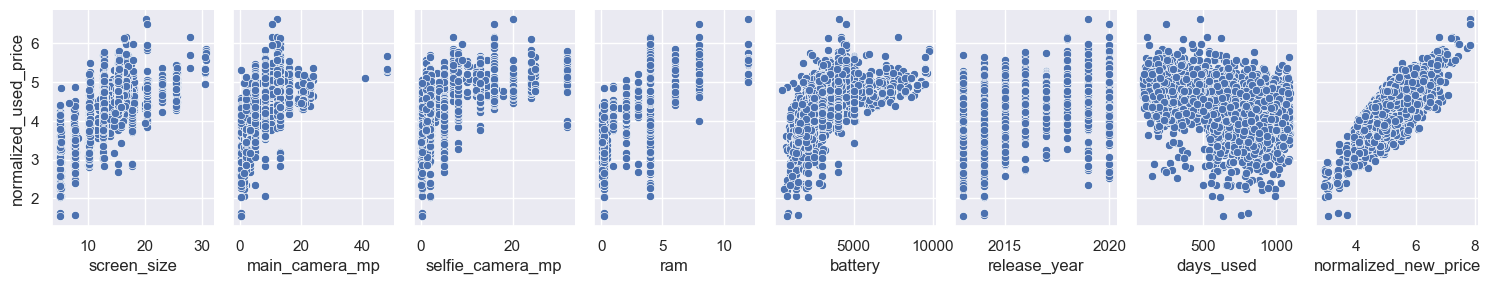

In [57]:
g=sns.pairplot(data=df1,y_vars='normalized_used_price',x_vars=['screen_size','main_camera_mp','selfie_camera_mp','ram','battery','release_year','days_used','normalized_new_price'],);
g.fig.set_size_inches(15,3)

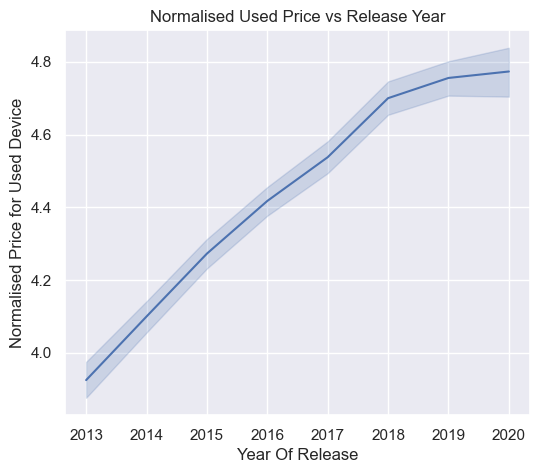

In [58]:
plt.figure(figsize=(6, 5))
sns.lineplot(df1,x='release_year',y='normalized_used_price');
plt.xlabel('Year Of Release')
plt.ylabel('Normalised Price for Used Device')
plt.title('Normalised Used Price vs Release Year');

### Observations:
* Normalised used device prices are positively correlated with screen size, Main camera, Selfie Camera, ram size,battery capacity, release year and Normalised new device prices
* Normalised used device prices is highly correlated to Normalised new  device prices meaning the refurbished price increased based on the price of its brand new value.




## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [59]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### Observations:
*   There are 6 columns with missing values.
*   Lets treat them with median value based on Release year and Brand name





In [60]:
cols_null = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]

for x in cols_null:
    df1[x] = df1[x].fillna(value=df1.groupby(['release_year','brand_name'])[x].transform("median"))

df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are still Missing values present lets treat them with median  value based on just the brand name

In [61]:
cols_null = ["main_camera_mp","selfie_camera_mp","battery","weight"]
for x in cols_null:
    df1[x] = df1[x].fillna(value=df1.groupby(['brand_name'])[x].transform("median"))
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Now lets treat the remaining Missing Values in Main camera with its median value

In [62]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature engineering

As per the problem statement the data was collected on 2021 so lets find the year since release value for each device.

In [63]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)

Lets log transform the weight column to normlize its values and drop the weight column after it.

In [64]:
df1['log_weight']=np.log(df1['weight'])
df1.drop('weight',axis=1,inplace=True)

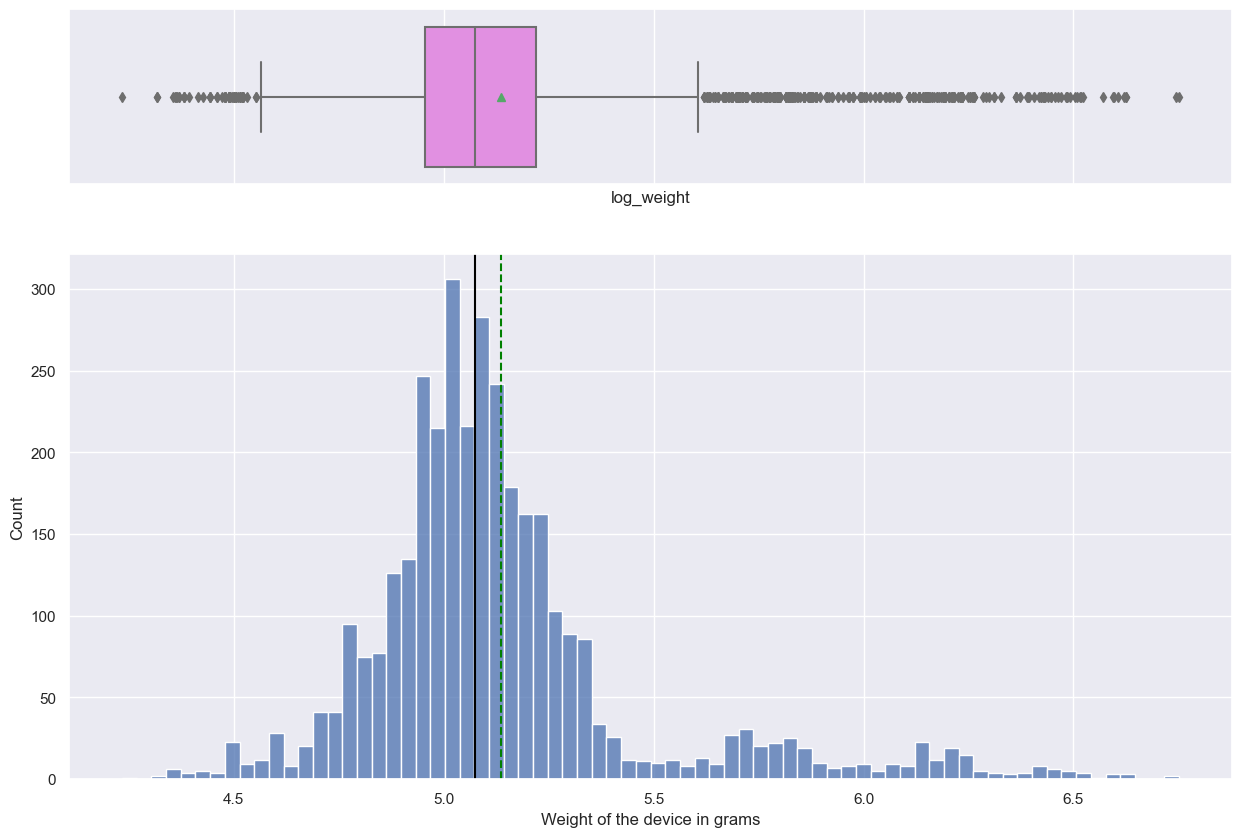

In [65]:
histogram_boxplot(df1,"log_weight")
plt.xlabel("Weight of the device in grams");

### **Outlier detection and treatment**

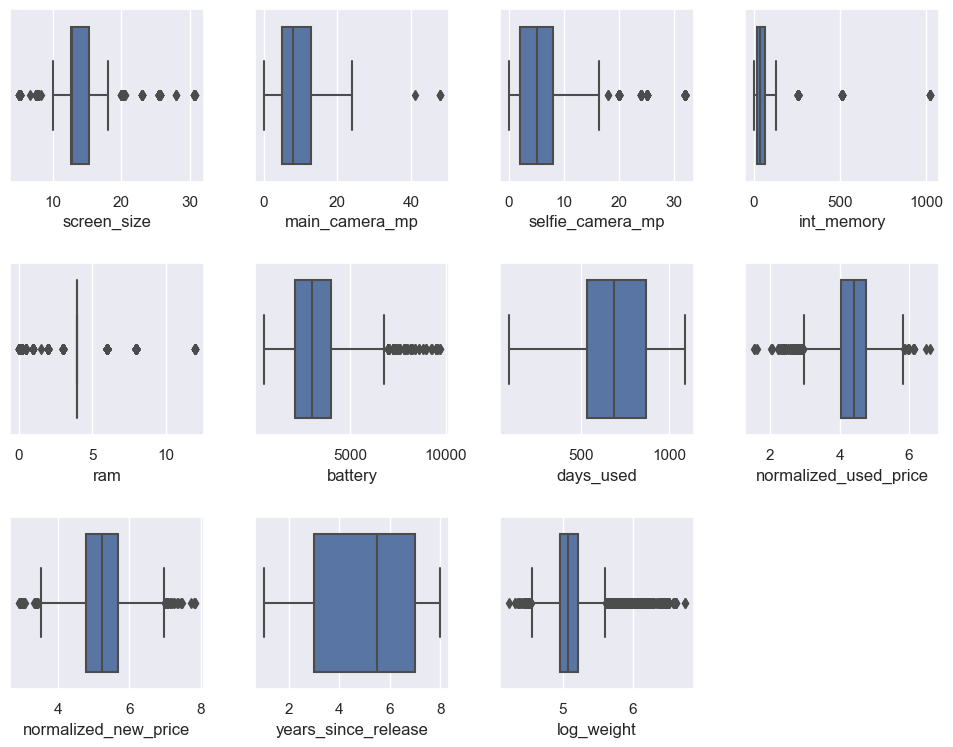

In [66]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Observations:
*   There are outliers present in the data except for release year and days used. We will not treat them as they are proper values.





## EDA

In [67]:
df2=df1.copy()

In [68]:
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,years_since_release,log_weight
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,1,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,1,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,1,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,345,5.135387,5.630961,1,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,1,5.220356


- It is a good idea to explore the data once again after manipulating it.

### **After treating the Missing Values:**

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  days_used              3454 non-null   int64  
 11  normalized_used_price  3454 non-null   float64
 12  normalized_new_price   3454 non-null   float64
 13  years_since_release    3454 non-null   int64  
 14  log_weight             3454 non-null   float64
dtypes: f

There are no Missing values.

In [70]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


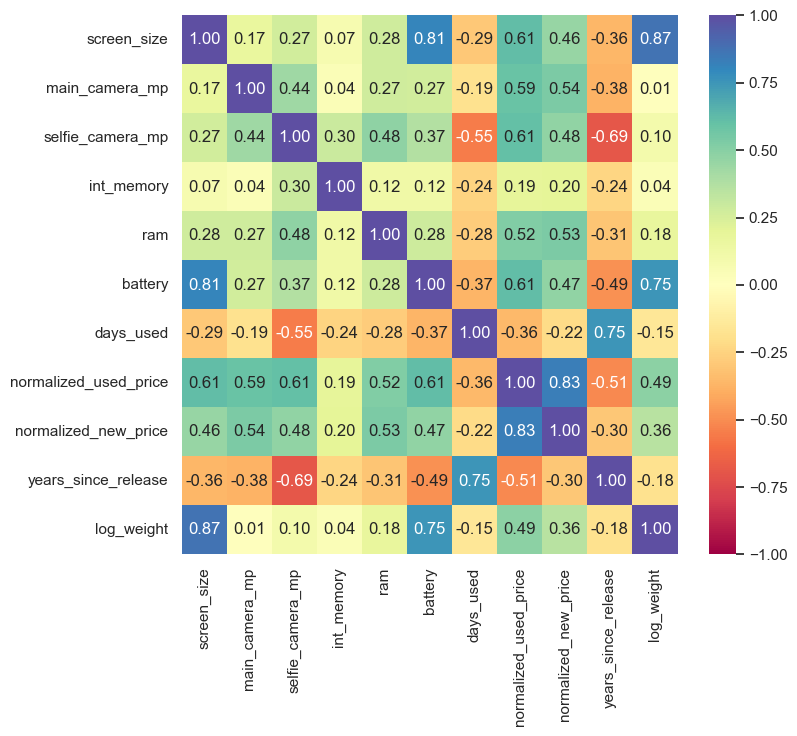

In [71]:
cols_list = df2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(8, 7))
sns.heatmap(df2[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

In [72]:
df2[cols_list].corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,years_since_release,log_weight
screen_size,1.000000,0.166747,0.271639,0.072158,0.278085,0.811678,-0.291723,0.614785,0.460889,-0.364223,0.867382
main_camera_mp,0.166747,1.000000,0.436236,0.041150,0.274184,0.269177,-0.185971,0.590853,0.537730,-0.377299,0.012895
selfie_camera_mp,0.271639,0.436236,1.000000,0.296735,0.478071,0.370010,-0.552605,0.607826,0.475019,-0.690883,0.101353
int_memory,0.072158,0.041150,0.296735,1.000000,0.124638,0.118686,-0.242464,0.191417,0.196481,-0.235329,0.041703
ram,0.278085,0.274184,0.478071,0.124638,1.000000,0.283241,-0.279892,0.522324,0.533808,-0.312432,0.177373
battery,0.811678,0.269177,0.370010,0.118686,0.283241,1.000000,-0.370949,0.612995,0.470722,-0.488427,0.753519
days_used,-0.291723,-0.185971,-0.552605,-0.242464,-0.279892,-0.370949,1.000000,-0.358264,-0.216625,0.750390,-0.152838
normalized_used_price,0.614785,0.590853,0.607826,0.191417,0.522324,0.612995,-0.358264,1.000000,0.834496,-0.509790,0.489765
normalized_new_price,0.460889,0.537730,0.475019,0.196481,0.533808,0.470722,-0.216625,0.834496,1.000000,-0.303689,0.358938
years_since_release,-0.364223,-0.377299,-0.690883,-0.235329,-0.312432,-0.488427,0.750390,-0.509790,-0.303689,1.000000,-0.183367


In [73]:
df2.isnull().sum().sum()

0

In [74]:
df2.duplicated().sum()

0

## **Data Preparation for Modeling**

* We want to predict the normalised used price of a device.
* Before we proceed to build a model, we'll have to encode categorical features
* We'll split the data into train and test to be able to evaluate the model that we build on the train data
* We will build a Linear Regression model using the train data and then check it's performance

In [75]:
X=df2.drop(['normalized_used_price'],axis=1)
y=df2['normalized_used_price']
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,years_since_release,log_weight
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.715100,1,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.519018,1,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.884631,1,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,345,5.630961,1,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.947837,1,5.220356


In [76]:
X = sm.add_constant(X)

In [77]:
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,years_since_release,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,127,4.715100,1,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,325,5.519018,1,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,162,5.884631,1,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,345,5.630961,1,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,293,4.947837,1,...,0,0,0,0,0,0,0,0,1,0


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [79]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [80]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     273.6
Date:                   Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:47:43   Log-Likelihood:                 142.23
No. Observations:                   2417   AIC:                            -186.5
Df Residuals:                       2368   BIC:                             97.27
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### **Observations:**
1. **Adj. R-squared is 0.844**, which is good.
2. **Y-intercept** i.e. the value for **const coefficient** is **-0.0673**
3. **Coefficient of a predictor variable:**i.e. change in the output y due to a change in the predictor variable  in our case,one of the coefficient of normalised_new_price is **0.4241**.

## Model Performance Check

Let's check the performance of the model using different metrics.

In [81]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [82]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228143,0.177986,0.847226,0.844064,4.269928


In [83]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236878,0.183521,0.84443,0.836706,4.463713


**Observations**

The training R2
 is 0.84, so the model is not underfitting

The train and test RMSE and MAE are comparable, so the model is not overfitting either

MAE suggests that the model can predict normalised used price within a mean error of 0.18 on the test data

MAPE of 4.463 on the test data means that we are able to predict within 4.5% of the normalised used price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### **TEST FOR MULTICOLLINEARITY**

In [84]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [85]:
checking_vif(X_train)

,feature,VIF
0,const,948.215525
1,screen_size,7.095324
2,main_camera_mp,2.267719
3,selfie_camera_mp,2.805788
4,int_memory,1.364667
5,ram,2.280398
6,battery,4.054852
7,days_used,2.652072
8,normalized_new_price,3.138493
9,years_since_release,4.779234


### Observations:
* There are two columns with  VIF values greater than 5 (excluding dummy variables), indicating presence of moderate multicollinearity
* By defining a method we will check which column by Checking the effect of dropping the columns showing high multicollinearity on model performance
* We will ignore the VIF values for dummy variables and the constant (intercept)

In [86]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [87]:
col_list = ["screen_size","log_weight"]
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.841460,0.232457
1,log_weight,0.838071,0.234928


Dropping the **log_weight** column has maximum effect on the model compared to Screen size column.so we will drop the **Screen Size** data.

In [88]:
col_to_drop = "screen_size"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,653.079206
1,main_camera_mp,2.267279
2,selfie_camera_mp,2.804475
3,int_memory,1.363174
4,ram,2.279289
5,battery,3.742326
6,days_used,2.647036
7,normalized_new_price,3.115869
8,years_since_release,4.704532
9,log_weight,3.101899


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [89]:
olsmod1 = sm.OLS(y_train, X_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     273.8
Date:                   Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:47:43   Log-Likelihood:                 121.19
No. Observations:                   2417   AIC:                            -146.4
Df Residuals:                       2369   BIC:                             131.5
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Observations:
* There is a negligible change in **Adj. R-squared** value after dropping one of the column and all the other columns passes the check for multicollinearity.

### **Dealing with high p-value variables**

*  The columns Battery , days_used have p-value greater than  0.05. So, they are not significant and we'll drop them.

In [90]:
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'years_since_release', 'log_weight', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


In [91]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [92]:
olsmod2 = sm.OLS(y_train, X_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     915.7
Date:                   Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:47:44   Log-Likelihood:                 103.14
No. Observations:                   2417   AIC:                            -176.3
Df Residuals:                       2402   BIC:                            -89.42
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [93]:
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231863,0.180075,0.842204,0.841218,4.326181


In [94]:
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238988,0.185087,0.841645,0.839319,4.50196


### Observations:
* There is no change in **Adj. R-squared** value after dropping  the column with p-value greater than 0.05.
* Now no feature has p-value greater than 0.05, so we'll consider the features in X_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with.
* Now adjusted R-squared is 0.84, i.e., our model is able to explain ~83% of the variance
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### **TEST FOR LINEARITY AND INDEPENDENCE**

In [95]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.824281,0.263207
1525,4.448399,4.688246,-0.239847
1128,4.315353,4.301263,0.014090
3003,4.282068,4.146593,0.135475
2907,4.456438,4.488570,-0.032132


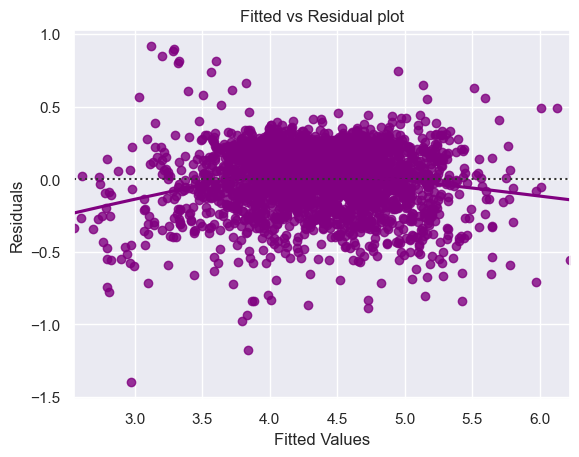

In [96]:
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot");

We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### **TEST FOR NORMALITY**

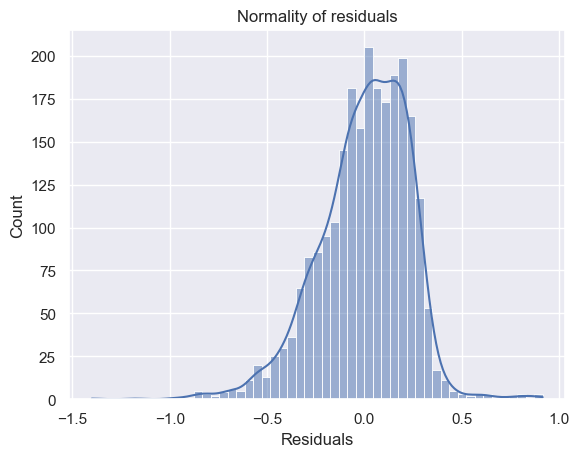

In [97]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals");

* The histogram of residuals does have a bell shape.
* Let's check the Q-Q plot.

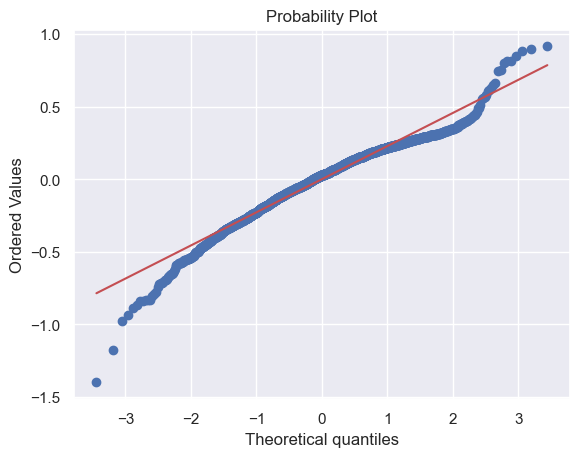

In [98]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab);

* The residuals more or less follow a straight line except for the tails.
* Let's check the results of the Shapiro-Wilk test.

In [99]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.967512845993042, pvalue=6.05679261984151e-23)


* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
* So, the assumption is satisfied.

### **TEST FOR HOMOSCEDASTICITY**

In [100]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.047049706267456), ('p-value', 0.21360228274844864)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## **Predictions on test data**

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [101]:
pred = olsmod2.predict(X_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.381849
2341,3.696103,4.009237
1913,3.592093,3.605245
688,4.306495,4.113188
650,4.522115,5.184239
2291,4.259294,4.394035
40,4.997685,5.402556
1884,3.875359,4.041708
2538,4.206631,4.027386
45,5.380450,5.226004


**We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable**

## Final Model

In [102]:
X_train_final = X_train3.copy()
X_test_final = X_test3.copy()

In [103]:
olsmodel_final = sm.OLS(y_train, X_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     915.7
Date:                   Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:47:45   Log-Likelihood:                 103.14
No. Observations:                   2417   AIC:                            -176.3
Df Residuals:                       2402   BIC:                            -89.42
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [104]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, X_train_final, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231863,0.180075,0.842204,0.841218,4.326181


In [105]:
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, X_test_final, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238988,0.185087,0.841645,0.839319,4.50196


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.50% of the normalised used price of the device.

* Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

In [106]:
olsmodel_final.params.nlargest(15)

log_weight              0.447853
normalized_new_price    0.426440
brand_name_Karbonn      0.138730
brand_name_Nokia        0.086243
brand_name_Xiaomi       0.077958
brand_name_Lenovo       0.046601
4g_yes                  0.043462
main_camera_mp          0.021492
ram                     0.020868
selfie_camera_mp        0.014067
years_since_release    -0.023282
brand_name_Sony        -0.059559
5g_yes                 -0.064804
os_Others              -0.098167
const                  -0.461765
dtype: float64

In [107]:
df['5g'].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

In [108]:
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(X_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(X_train_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            X_train_final.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", X_train_final.columns[i], ")")

normalized_used_price = -0.4617645228297414 + 0.02149236761031707 * ( main_camera_mp ) +  0.014067250464622313 * ( selfie_camera_mp ) +  0.020868495262354764 * ( ram ) +  0.42644039859622396 * ( normalized_new_price ) +  -0.023282101799500642 * ( years_since_release ) +  0.44785289023796876 * ( log_weight ) +  0.1387303747095544 * ( brand_name_Karbonn ) +  0.046601205842440055 * ( brand_name_Lenovo ) +  0.08624331168483695 * ( brand_name_Nokia ) +  -0.059558773520107744 * ( brand_name_Sony ) +  0.07795773922551869 * ( brand_name_Xiaomi ) +  -0.0981665114306139 * ( os_Others ) +  0.043462088123360054 * ( 4g_yes ) +  -0.06480366217855832 * ( 5g_yes )


## Actionable Insights and Recommendations


*   The model is able to explain ~83% of the variation in the data and within 4.50% of the used price on the test data, which is good.
      This indicates that the model is good for prediction as well as inference purposes
*   If the normalized_new_price of a device increases by one unit, then its normalized_used_price increases by 0.426 units, all other variables held constant
  This indicates that the price for used and  refurbished device is highly dependent on its Original price.
*   The other values  4g conectivity ,Main camera ,Ram and Selfie camera have positive correlation with the dependent variable i.e. used  device price.
*   There is a negative correlation between the used device price and year since release .
     The price of the refurbished device decreases as the device gets older which is logical.






### Recommendations:
1.  This linear regression model can be used in the future by the company to make the prediction on the used and refurbished price of the devices.
2. The company should focus on the devices that had high Original price because it has a huge effect on the resale value.
3.  The company should refrain from selling the devices running on Operating systems other than Android,IOS and Windows.
4.  Brands like karbonn and Xiaomi have a positive effect on the resale value of the used and refurbished device.
5.  The device with 5g connectivity show a negative correlation with used price but there are not many devices with 5g connectivity in the given data so further investigation is required.
6.  In addition to the original price the company should also focus on other features of the devices such as 4g conectivity,  Main camera, Ram size and Selfie camera which evidently favour in increase in the value of the used and refurbished devices.  

